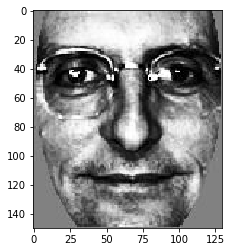

In [77]:
import os 
from os import listdir 
from os.path import isfile, join
import numpy as np 
%matplotlib inline 
from matplotlib import pyplot as plt
import matplotlib.image as img
# C:\Users\Kevin\cmsc426\StarterFiles\Test1
# image = img.imread('/Users/Kevin/Test1/00001fa010.930831.jpg')
image = img.imread('/Users/Kevin/cmsc426/StarterFiles/Test1/00001fb010.930831.jpg') ## Load an image as numpy array
plt.imshow(image, interpolation='nearest') #display the image 
plt.gray()  #grayscale conversion
plt.show()


In [78]:
# read the first 10 rows and columns of the image
image

array([[133, 124, 127, ..., 133, 129, 129],
       [131, 125, 129, ..., 125, 129, 129],
       [129, 126, 131, ..., 129, 129, 129],
       ...,
       [129, 129, 129, ..., 129, 129, 129],
       [129, 129, 129, ..., 129, 129, 129],
       [129, 129, 129, ..., 129, 129, 129]], dtype=uint8)

In [79]:
image[5,1]

128

In [80]:
# neutral = []

# for i in range(200):
#     i += 1
#     image = img.imread('/Users/Kevin/cmsc426/StarterFiles/Test1/00001fb010.930831.jpg')
#     image = image[1:10,1:10]
#     imgage = np.array(img).flatten() # vectorization
#     neutral.append(img2)

In [81]:

# mypath = '/Users/Kevin/cmsc426/StarterFiles/Test1'

# onlyfiles = [ f for f in listdir(mypath) if isfile(join(mypath,f)) ]
# images1 = np.empty(len(onlyfiles), dtype=object)
# for n in range(0,len(onlyfiles)):
#     images1[n] = cv2.imread(join(mypath,onlyfiles[n]))
    
    

In [82]:
faces_matrix = np.vstack(image)
faces_matrix.shape

(150, 130)

In [83]:
mean_face = np.mean(faces_matrix, axis=0)
mean_face.shape

(130,)

(150, 130)

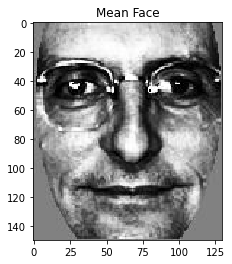

In [84]:
plt.imshow(faces_matrix,interpolation='nearest'); 
plt.title('Mean Face')

### normalization
faces_norm = faces_matrix - mean_face
faces_norm.shape

In [90]:
face_cov = np.cov(faces_norm.T) #np.cov expects features as rows and observations as columns, so transposed
face_cov.shape

(130, 130)

In [91]:
eigen_vecs, eigen_vals, _ = np.linalg.svd(face_cov)
eigen_vecs.shape

(130, 130)

TypeError: Invalid shape (130,) for image data

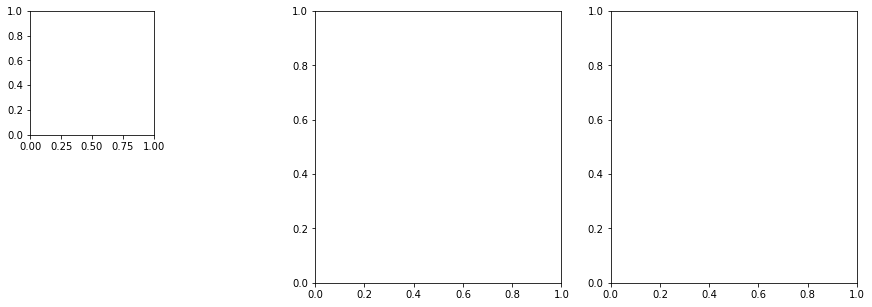

In [92]:
fig, axs = plt.subplots(1,3,figsize=(15,5))
for i in np.arange(10):
    ax = plt.subplot(2,5,i+1)
    img = eigen_vecs[:,i]
    plt.imshow(img, cmap='gray')
fig.suptitle("First 10 Eigenfaces", fontsize=16)